# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [ ]:
# from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [ ]:
# call_on_students(1)

In [1]:
# Code here

# need mu and sigma
x = 8
mu = 6 
S = 2

z_eight = (x - mu) / S
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [ ]:
# call_on_students(1)


In [2]:
from scipy import stats

In [10]:
# Code here

# same as ; 1 - stats.norm.cdf(z_eight)
over_eight = stats.norm.sf(z_eight)
over_eight

0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [ ]:
# call_on_students(1)

In [16]:
# Code here
confidence = 0.95
conf_range = ((conf_min := (1-confidence)/2) , conf_min + confidence)
display(conf_range)

x_bar = 5
std = 0.5
n = 7

se = std / (n**0.5)

stats.t.interval(alpha=0.95,
    loc=x_bar, # mean
    scale=se, # standard error
    df=n-1) # degrees of freedom

(0.025000000000000022, 0.975)

(4.53757712628571, 5.46242287371429)

In [17]:
#t_val = stats.t.ppf(0.975, n-1)
#samp_std_err = std/(n**0.5)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- We can expect 95% of our populations to have a their mean within this range 
- 95% chance for the interval to contain our true population mean (4.53 , 5.46 hrs)


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [ ]:
# call_on_students(1)

In [24]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('./data/auto-mpg.csv')

In [20]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [22]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
display(
    df['cylinders'].value_counts(),
    df['model year'].value_counts(),
    df['origin'].value_counts())

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

1    245
3     79
2     68
Name: origin, dtype: int64

In [28]:
df.value_counts(['origin','model year','cylinders'])

origin  model year  cylinders
1       73          8            20
        70          8            18
        82          4            16
        72          8            13
        75          6            12
                                 ..
        81          8             1
2       81          6             1
        80          5             1
        79          5             1
        76          6             1
Length: 76, dtype: int64

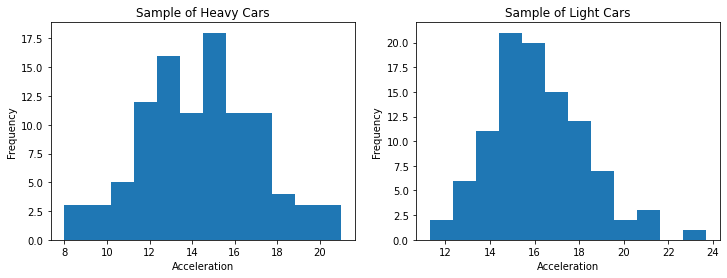

In [23]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate different than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- Light cars and heavy cars accelerate at the same rates


**Alternative hypothesis:**

- Light cars accelerate at a different rate than heavy cars ( > | < )


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- we may falsely conclude that light cars accelerate at a different rate from heavy cars where they actually accelerate at the same rate
(^ 1:1 relation to alpha/threshold)


**Type II Error:**

- we may falsely conclude that light and heavy cars accelerate at the same rate when they actually accelerate at different rates



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- this would be a t-test as we do not have the full population
- we are also comparing 1 variable against 1 variable. 2 sample
- two sided


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [34]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
# Code here
alpha = 0.05
stats.ttest_ind(light_cars['acceleration'],heavy_cars['acceleration'],equal_var=True)

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

### 8c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- Yes. The p value is extremely low. Well below our alpha/confidence level.
- We will reject the null hypothesis.


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

In [50]:
"""
- p_dem = 60%           P(Dem)
- p_not_dem = 1 - 60%   P(Rep)
- p_no_given_dem = 75%  P(N|Dem)
- p_no_given_rep = 5%   P(N|Rep)
"""

'\n- p_dem = 60%           P(Dem)\n- p_not_dem = 1 - 60%   P(Rep)\n- p_no_given_dem = 75%  P(N|Dem)\n- p_no_given_rep = 5%   P(N|Rep)\n'

### Task 9: Calculate the probability

In [ ]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - prob dem_given_no <= probability that someone voting no is a democrat
   
    
**2. Based on that, what other pieces do we need?**

   - prob_dem, prob_no, prob_dem_given_no
    
    
**3. Result?**

   - prob_dem_given_no = (prob_no_given_dem * prob_dem) / prob_no
   
   `=============================================`
    

In [51]:
prob_dem = 0.6
prob_no_given_dem = 0.75
prob_rep = 1 - prob_dem
prob_no_given_rep = 0.05
prob_no = (prob_dem * prob_no_given_dem) + (prob_rep * prob_no_given_rep)

prob_dem_given_no = (prob_no_given_dem * prob_dem )/ prob_no

prob_dem_given_no

0.9574468085106382

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [52]:
import seaborn as sns

In [ ]:
# call_on_students(1)

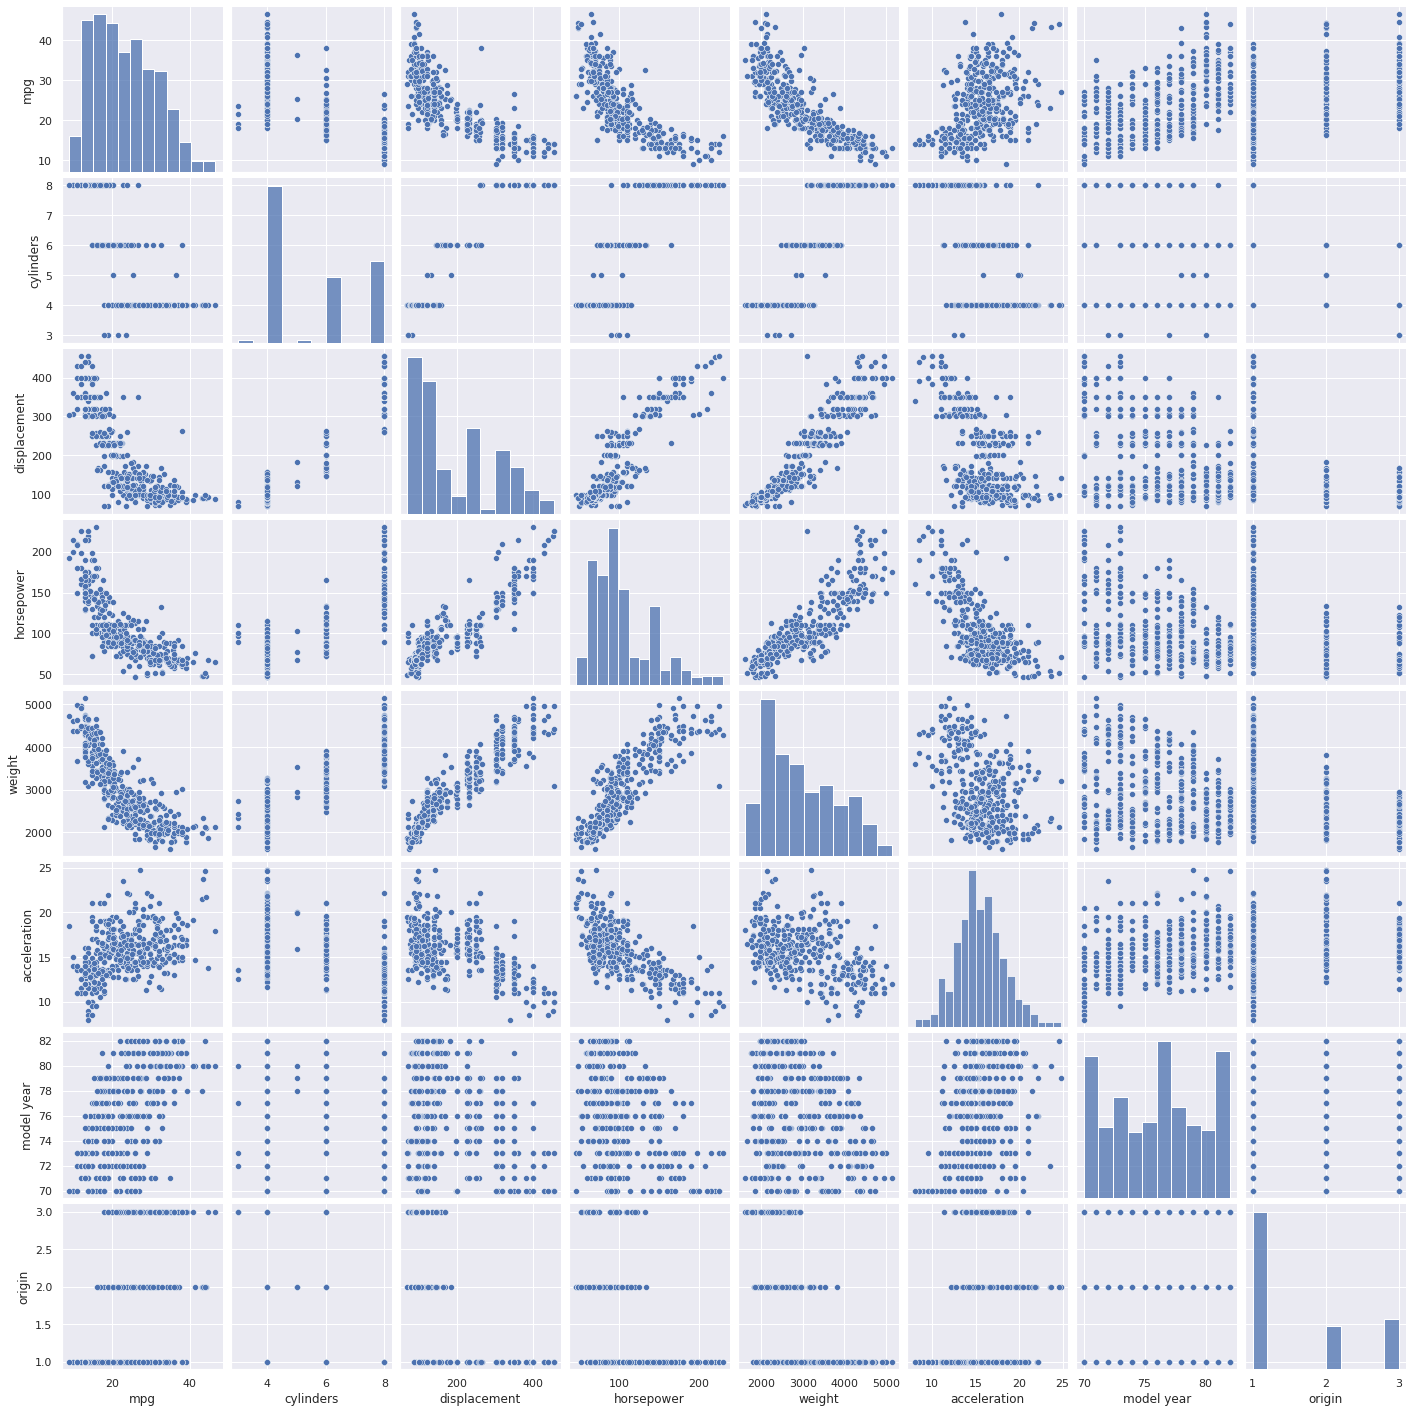

In [56]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.set()
sns.pairplot(df)

<AxesSubplot:>

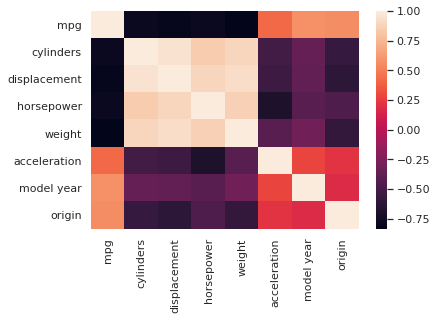

In [78]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
"""fig, ax = plt.subplots(1,2, figsize=(9.5,8), sharey=True)
ax[0] = sns.heatmap(df.corr())
ax[1] = sns.heatmap(df.corr())"""
sns.heatmap(df.corr())

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [ ]:
# call_on_students(1)

**Observations:**

- weight has the strongest correlation
- target/mpg is mostly normal
- there are a lot of things with a lot of collinearity, issues are potential with regressions


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# call_on_students(1)

In [96]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!

y = df['mpg']       # endog
X = df['weight']    # exog

simple_model = sm.OLS(y, sm.add_constant(X)).fit()#.summary()

In [97]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        16:50:00   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [ ]:
# call_on_students(1)

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- r2 is 0.69, weight explains 69% of variance in mpg
- for every unit of weight that is increased, mpg is reduced by -0.0076 / expected mpg is ,on avg, reduced by 0.0076 for each 1 weight unit increased


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [88]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# call_on_students(1)

In [104]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
y_mlr = df['mpg']
X_mlr = df[['cylinders','displacement','horsepower','weight','acceleration']]

multi_model = sm.OLS(y_mlr, sm.add_constant(X_mlr)).fit()

In [105]:
model_summary = multi_model.summary()

In [106]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          9.82e-101
Time:                        16:58:52   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [ ]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- r2(adj) is higher in multi
- better explains variance in mpg
- cond is still high, large (multi)collinearity 
    - there are insignificant features that could be dropped to correct this


In [107]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [108]:
df['model year'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

In [109]:
df['model year'].nunique()

13

In [110]:
df['origin'].nunique()

3

In [112]:
df['car name'].nunique()

301

In [113]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the co

In [121]:
pd.get_dummies(df['model year']).drop(df['model year'].value_counts().index[0],axis=1)

,70,71,72,74,75,76,77,78,79,80,81,82
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,0,1
388,0,0,0,0,0,0,0,0,0,0,0,1
389,0,0,0,0,0,0,0,0,0,0,0,1
390,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

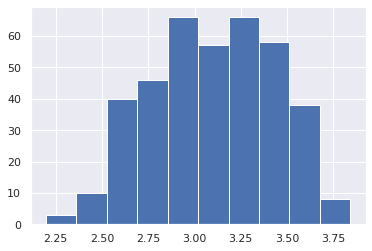

In [123]:
import numpy as np
mp_log = np.log(df['mpg'])
mp_log.hist()